In [6]:
%matplotlib inline
import matplotlib.pylab as plt

Categorical distribution is expansion of Bernoulli distribution.

베르누이 분포는 0 or 1이 나오는 확률 변수의 분포였다. 예로 들어 결과값이 head or tail인 동전을 묘사할 때 쓸 수 있다. 그런데 주사위를 던져서 나오는 경우는 어떻게 묘사할 수 있을까? 이 때 사용하는 것이 Categorical distribution이다.

주의할 점이 있다. 카테고리 분포는 카테고리인 스칼라 값을 출력하는 확률 변수이지만 보통 다음과 같이 1,0로만 이뤄진 다차원 벡터 형태로 인코딩한 값을 출력하는 벡터 확률 변수로 사용한다.

- x=1 -> x=(1,0,0,0,0,0)
- x=2 -> x=(0,1,0,0,0,0)
- x=3 -> x=(0,0,1,0,0,0)
- x=4 -> x=(0,0,0,1,0,0)
- x=5 -> x=(0,0,0,0,1,0)
- x=6 -> x=(0,0,0,0,0,1)

이러한 encoding 방식을 One-Hot-Encoding 이라고 한다.

출력되는 확률 변수의 값 x가 다음과 같이 벡터 값이 된다.
x=(x1,x2,x3,x4,x5,x6)

Element x_k has parameter theta_k cuz, x can be considered each element forms Bernoulli probability distribution.

x_i 의 값은 0,1만 가능하고, x_i중 단 하나만 1일 수 있다는 조건 두 개가 붙는다.
즉, x_i는 베르누이 확률 분포를 가지고 있으므로 각각 1이 나올 확률을 나타내는 모수 theta를 가지는데 theta=(theta_1,theta_2,...,theta_k)의 카테고리 분포의 모수를 띈다.

이에 따라 카테고리 분포는 Cat(x1,x2,...,xk;theta_1,theta_2,...,theta_k)로 표기한다.
- 출력 벡터: x=(x1,x2,...,xk)
- 모수 벡터: theta=(theta1,...,theta_k)
를 사용해서 Cat(x;theta)로 간단히 표기할 수도 있다.

Cat(x;theta) = {
- theta_1 if x = (1,0,0,...,0)
- theta_2 if x=  0,1,0,...,0)
.
.
- theta_k if x = (0,0,...,1)
}

Cat(x;theta) = theta_1(x1)theta_2(x2),...,thata_k(xk)
따라서 first moment/E[x_k] = theta_k secondmoment/ Var[x_k] = theta_k(1-theta_k)

위에 말이 너무 허접하다면, 쉽게 생각해보자. x_i는 위에서 말햇다시피, 1 or 0 값 두 개만 가질 수 있다고 했다. 그리고 각각의 확률 변수들은 베르누이 분포를 띄고 있어서 각각 1이 나올 확률을 나타내는 모수 theta를 지닌다고 했다. parameter와 variable을 합치면,`(theta_i)**(x_i)`가 된다. 이는 확률 변수가 binary 값만을 띄고 있기에 가능한 수식이고 x_i 가 x 의 categorical distribution의 전체 확률로 generalization된다면 
- `Cat(x;theta) = (theta_1)**(x_1) (theta_2)**(x_2),...,(theta_k)**(x_k)`가 된다.

Scipy는 카테고리 분포를 위한 별도의 클래스를 제공하지 않으므로 , multinomial 클래스에서 적용할 명령어 `multinomial`에서 N을 1로 설정하면 cat이 되므로 이 명령을 사용한다.

In [15]:
theta = np.array([1/6]*6)
rv = sp.stats.multinomial(1,theta)

In [50]:
xx=np.arange(1,7)
xx_ohe=pd.get_dummies(xx)
xx_ohe
# Convert categorical variable into dummy/indicator variables
# categorical distribution은 One-Hot-Encoding 을 하기 위해서 0들과 하나의 1로 구성된 벡터들이 있어야 한다. 이를 위한 명령어 get_dummies이다.

,1,2,3,4,5,6
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
5,0,0,0,0,0,1


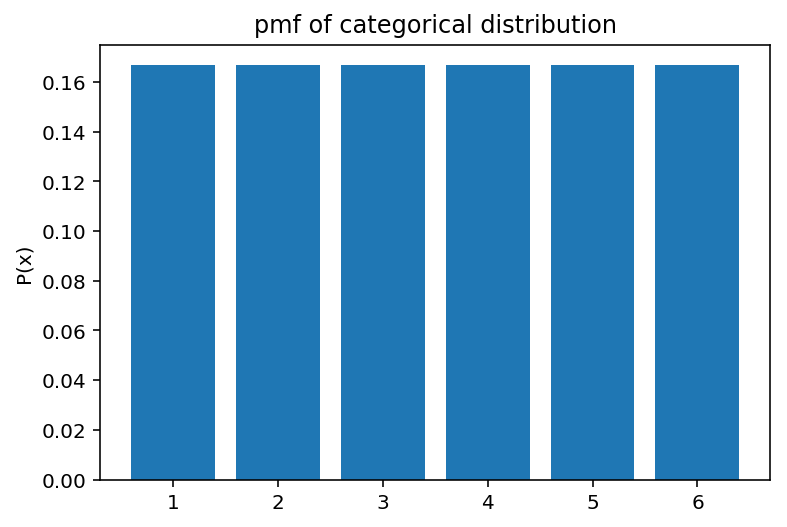

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


In [17]:
plt.bar(xx,rv.pmf(xx_ohe))
plt.ylabel('P(x)')
plt.title('pmf of categorical distribution')
plt.show()
print(rv.pmf(xx_ohe))

In [46]:
np.random.seed(1)
X = rv.rvs(10000)
X[:5]

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0]])

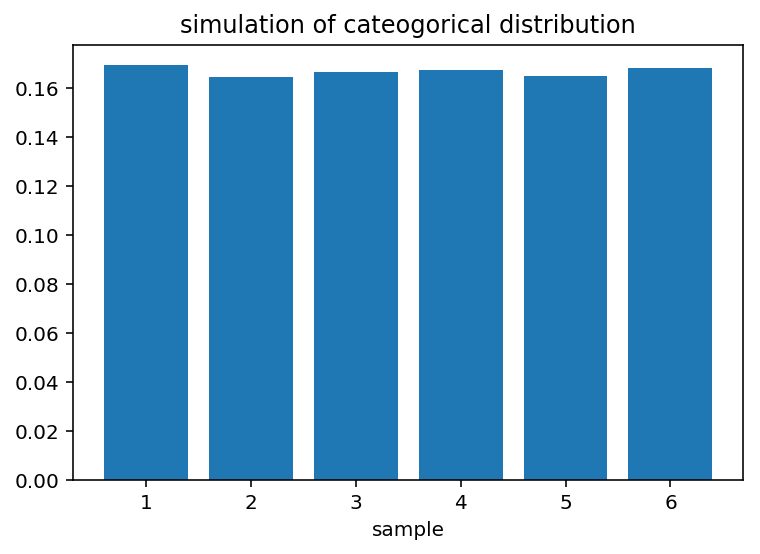

In [47]:
y = X.sum(axis=0) / float(len(X))
plt.bar(np.arange(1, 7), y)
plt.title("simulation of cateogorical distribution")
plt.xlabel("sample")
plt.show()

In [48]:
y = X.sum(axis=0) / float(len(X))
df = pd.DataFrame({"theory": rv.pmf(xx_ohe), "simulation": y}).stack().reset_index()
df.columns=['sample','type','ratio']
df

,sample,type,ratio
0,0,simulation,0.169100
1,0,theory,0.166667
2,1,simulation,0.164300
3,1,theory,0.166667
4,2,simulation,0.166400
5,2,theory,0.166667
6,3,simulation,0.167200
7,3,theory,0.166667
8,4,simulation,0.164800
9,4,theory,0.166667


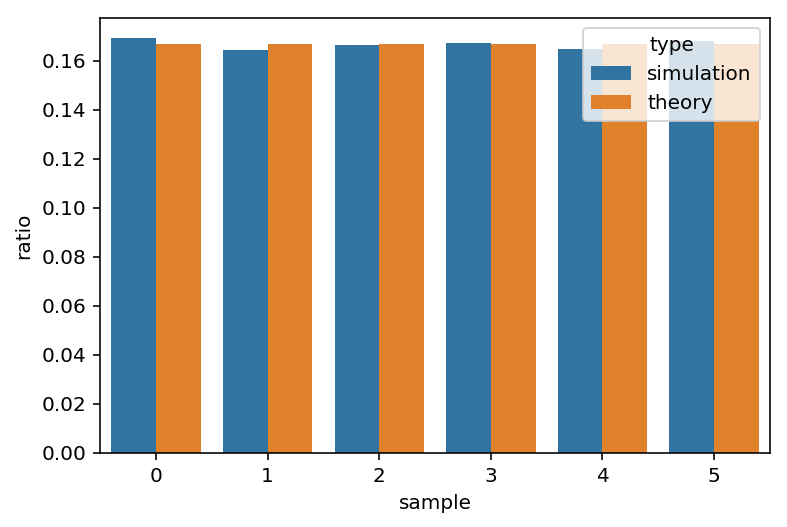

In [49]:
import seaborn as sns
sns.barplot(x='sample',y='ratio',hue='type',data=df)
plt.show()

simulation 값과 theory값이 시행 횟수와 error 가 반비례한다. 시행횟수가 높아지면, error가 작아진다.